* ****
## Matrix name
* **ccfArray** index from selected CCF, 337 types in total 
* **Contour_01** 0-1 matrix with 1 indicating the contour


In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.78
Loading CCF brain structure data...
Loading time: 0.00
Loading selected CCF Atlas and Contour data...
Loading time: 0.88


In [3]:
len(nmt.bs.selected_regions)


316

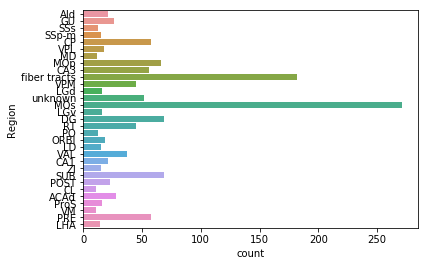

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

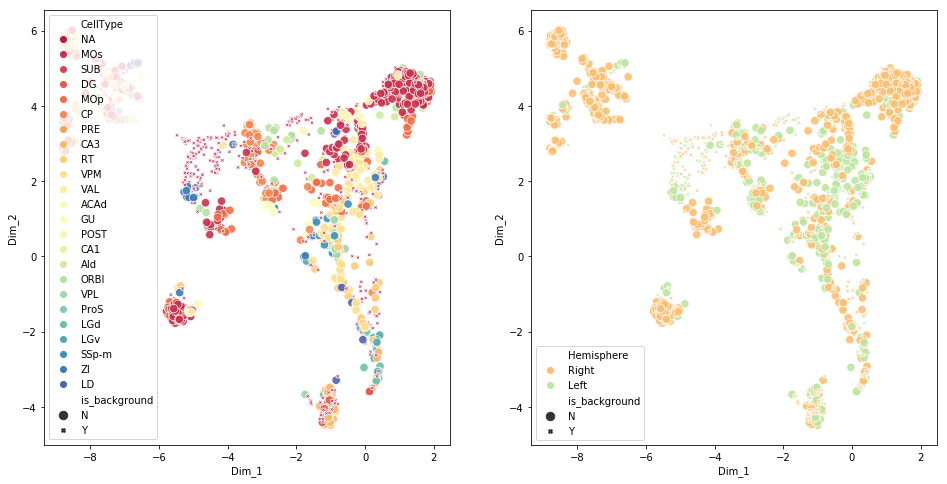

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [3]:
ccfTransfer

,Child List
184,184 68 667 526157192 526157196 526322264
985,985 320 943 648 844 882
993,993 656 962 767 1021 1085
353,353 558 838 654 702 889 929
329,329 981 201 1047 1070 1038 1062 480149202 4801...
337,337 1030 113 1094 1128 478 510
345,345 878 657 950 974 1102 2
369,369 450 854 577 625 945 1026
361,361 1006 670 1086 1111 9 461
182305689,182305689 182305693 182305697 182305701 182305...


In [ ]:
找到316个ccf的所有子脑区，存成主脑区的ID,所有的子脑区有1135个。但是共有1137个脑区(不含0）

In [2]:
ccfArray =nmt.annotation.array.copy()
ccftable = pd.read_excel('/home/penglab/Documents/data/CCFv3 Summary Structures.xlsx', usecols=[1, 2, 3, 5, 6, 7], index_col=0,names=[ '','fullname', 'Abbrevation', 'depth in tree', 'structure_id_path','total_voxel_counts (10 um)'])
ccfTransfer = pd.DataFrame(index = ccftable.index.tolist())
for i in ccfTransfer.index.tolist():
    all_child=[str(i) for i in nmt.bs.get_all_child_id(i)]  
    split_list=' '.join(all_child) 
    ccfTransfer.loc[i,'Child List'] = split_list
    
for iterID in ccfTransfer.index.tolist():
    childlist = ccfTransfer.loc[iterID,'Child List'].split()
    for i_child in childlist:
        #print(i_child)
        #print(np.sum(ccfArray==int(i_child)))
        ccfArray[ccfArray==int(i_child)] = iterID
regionN, count = np.unique(ccfArray, return_counts=True)
not_IN_ccf = []
for i in regionN:
    if i not in ccfTransfer.index.tolist():
        not_IN_ccf.append(i)
print('Originally, CCF has '+ str(len(ccfTransfer.index.tolist()))+' regions, after using all the CCF index to replace the child region, there are '+ str(len(regionN))+' regions')
print('Besides, there are '+ str(len(not_IN_ccf))+' regions that show up in the nrrd array but have not been mentioned in CCF or its child region')

#pickle.dump([ccfArray], open("/home/penglab/NMTcode/CCF_Contour_6.pickle", "wb"))

Originally, CCF has 316 regions, after using all the CCF index to replace the child region, there are 337 regions
Besides, there are 23 regions that show up in the nrrd array but have not been mentioned in CCF or its child region


In [31]:
ccfArray[int(182.8430),int(192.0480),int(134.3610)]

672

In [29]:
ccfTransfer.loc[672,'Child List']

'672'

In [32]:
pickle.dump([ccfArray], open("/home/penglab/NMTcode/ccf_25.pickle", "wb"))

### 6-nearest neighbor

In [5]:
x_block = [range(ccfArray.shape[0])[i:i + 30] for i in range(0, ccfArray.shape[0], 30)]
y_block = [range(ccfArray.shape[1])[i:i + 30] for i in range(0, ccfArray.shape[1], 30)]
z_block = [range(ccfArray.shape[2])[i:i + 30] for i in range(0, ccfArray.shape[2], 30)]

import multiprocessing
import time
def Contour_block6(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        x2yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        xy1z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xy2z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xyz1 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        xyz2 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]):
            #print(str([centerV,x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]))
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
temp_array = ccfArray.copy()
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block6(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))



X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 0:30; Y range: 300:320; Z range: 270:300
X range: 0:30; Y range: 300:320; Z range: 300:330
X range: 0:30; Y range: 300:320; Z range: 330:360
X range: 0:30; Y range: 300:320; Z range: 360:390
X range: 0:30; Y range: 300:320; Z range: 390:420
X range: 0:30; Y range: 300:320; Z range: 420:450
X range: 0:30; Y range: 300:320; Z range: 450:456
X range: 30:60; Y range: 0:30; Z range: 0:30
X range: 30:60; Y range: 0:30; Z range: 30:60
X range: 30:60; Y range: 0:30; Z range: 60:90
X range: 30:60; Y range: 0:30; Z range: 90:120
X range: 30:60; Y range: 0:30; Z range: 120:150
X range: 30:60; Y range: 0:30; Z range: 150:180
X range: 30:60; Y range: 0:30; Z range: 180:210
X range: 30:60; Y range: 0:30; Z range: 210:240
X range: 30:60; Y range: 0:30; Z range: 240:270
X range: 30:60; Y range: 0:30; Z range: 270:300
X range: 30:60; Y range: 0:30; Z range: 300:330
X range: 30:60; Y range: 0:30; Z range: 330:360
X range: 30:60; Y range: 0:30; Z range: 360:390
X range: 30:60; Y range: 0:30; Z r

X range: 30:60; Y range: 270:300; Z range: 420:450
X range: 30:60; Y range: 270:300; Z range: 450:456
X range: 30:60; Y range: 300:320; Z range: 0:30
X range: 30:60; Y range: 300:320; Z range: 30:60
X range: 30:60; Y range: 300:320; Z range: 60:90
X range: 30:60; Y range: 300:320; Z range: 90:120
X range: 30:60; Y range: 300:320; Z range: 120:150
X range: 30:60; Y range: 300:320; Z range: 150:180
X range: 30:60; Y range: 300:320; Z range: 180:210
X range: 30:60; Y range: 300:320; Z range: 210:240
X range: 30:60; Y range: 300:320; Z range: 240:270
X range: 30:60; Y range: 300:320; Z range: 270:300
X range: 30:60; Y range: 300:320; Z range: 300:330
X range: 30:60; Y range: 300:320; Z range: 330:360
X range: 30:60; Y range: 300:320; Z range: 360:390
X range: 30:60; Y range: 300:320; Z range: 390:420
X range: 30:60; Y range: 300:320; Z range: 420:450
X range: 30:60; Y range: 300:320; Z range: 450:456
X range: 60:90; Y range: 0:30; Z range: 0:30
X range: 60:90; Y range: 0:30; Z range: 30:60

X range: 60:90; Y range: 270:300; Z range: 90:120
X range: 60:90; Y range: 270:300; Z range: 120:150
X range: 60:90; Y range: 270:300; Z range: 150:180
X range: 60:90; Y range: 270:300; Z range: 180:210
X range: 60:90; Y range: 270:300; Z range: 210:240
X range: 60:90; Y range: 270:300; Z range: 240:270
X range: 60:90; Y range: 270:300; Z range: 270:300
X range: 60:90; Y range: 270:300; Z range: 300:330
X range: 60:90; Y range: 270:300; Z range: 330:360
X range: 60:90; Y range: 270:300; Z range: 360:390
X range: 60:90; Y range: 270:300; Z range: 390:420
X range: 60:90; Y range: 270:300; Z range: 420:450
X range: 60:90; Y range: 270:300; Z range: 450:456
X range: 60:90; Y range: 300:320; Z range: 0:30
X range: 60:90; Y range: 300:320; Z range: 30:60
X range: 60:90; Y range: 300:320; Z range: 60:90
X range: 60:90; Y range: 300:320; Z range: 90:120
X range: 60:90; Y range: 300:320; Z range: 120:150
X range: 60:90; Y range: 300:320; Z range: 150:180
X range: 60:90; Y range: 300:320; Z rang

X range: 90:120; Y range: 240:270; Z range: 180:210
X range: 90:120; Y range: 240:270; Z range: 210:240
X range: 90:120; Y range: 240:270; Z range: 240:270
X range: 90:120; Y range: 240:270; Z range: 270:300
X range: 90:120; Y range: 240:270; Z range: 300:330
X range: 90:120; Y range: 240:270; Z range: 330:360
X range: 90:120; Y range: 240:270; Z range: 360:390
X range: 90:120; Y range: 240:270; Z range: 390:420
X range: 90:120; Y range: 240:270; Z range: 420:450
X range: 90:120; Y range: 240:270; Z range: 450:456
X range: 90:120; Y range: 270:300; Z range: 0:30
X range: 90:120; Y range: 270:300; Z range: 30:60
X range: 90:120; Y range: 270:300; Z range: 60:90
X range: 90:120; Y range: 270:300; Z range: 90:120
X range: 90:120; Y range: 270:300; Z range: 120:150
X range: 90:120; Y range: 270:300; Z range: 150:180
X range: 90:120; Y range: 270:300; Z range: 180:210
X range: 90:120; Y range: 270:300; Z range: 210:240
X range: 90:120; Y range: 270:300; Z range: 240:270
X range: 90:120; Y r

X range: 120:150; Y range: 210:240; Z range: 180:210
X range: 120:150; Y range: 210:240; Z range: 210:240
X range: 120:150; Y range: 210:240; Z range: 240:270
X range: 120:150; Y range: 210:240; Z range: 270:300
X range: 120:150; Y range: 210:240; Z range: 300:330
X range: 120:150; Y range: 210:240; Z range: 330:360
X range: 120:150; Y range: 210:240; Z range: 360:390
X range: 120:150; Y range: 210:240; Z range: 390:420
X range: 120:150; Y range: 210:240; Z range: 420:450
X range: 120:150; Y range: 210:240; Z range: 450:456
X range: 120:150; Y range: 240:270; Z range: 0:30
X range: 120:150; Y range: 240:270; Z range: 30:60
X range: 120:150; Y range: 240:270; Z range: 60:90
X range: 120:150; Y range: 240:270; Z range: 90:120
X range: 120:150; Y range: 240:270; Z range: 120:150
X range: 120:150; Y range: 240:270; Z range: 150:180
X range: 120:150; Y range: 240:270; Z range: 180:210
X range: 120:150; Y range: 240:270; Z range: 210:240
X range: 120:150; Y range: 240:270; Z range: 240:270
X

X range: 150:180; Y range: 180:210; Z range: 150:180
X range: 150:180; Y range: 180:210; Z range: 180:210
X range: 150:180; Y range: 180:210; Z range: 210:240
X range: 150:180; Y range: 180:210; Z range: 240:270
X range: 150:180; Y range: 180:210; Z range: 270:300
X range: 150:180; Y range: 180:210; Z range: 300:330
X range: 150:180; Y range: 180:210; Z range: 330:360
X range: 150:180; Y range: 180:210; Z range: 360:390
X range: 150:180; Y range: 180:210; Z range: 390:420
X range: 150:180; Y range: 180:210; Z range: 420:450
X range: 150:180; Y range: 180:210; Z range: 450:456
X range: 150:180; Y range: 210:240; Z range: 0:30
X range: 150:180; Y range: 210:240; Z range: 30:60
X range: 150:180; Y range: 210:240; Z range: 60:90
X range: 150:180; Y range: 210:240; Z range: 90:120
X range: 150:180; Y range: 210:240; Z range: 120:150
X range: 150:180; Y range: 210:240; Z range: 150:180
X range: 150:180; Y range: 210:240; Z range: 180:210
X range: 150:180; Y range: 210:240; Z range: 210:240
X

X range: 180:210; Y range: 150:180; Z range: 120:150
X range: 180:210; Y range: 150:180; Z range: 150:180
X range: 180:210; Y range: 150:180; Z range: 180:210
X range: 180:210; Y range: 150:180; Z range: 210:240
X range: 180:210; Y range: 150:180; Z range: 240:270
X range: 180:210; Y range: 150:180; Z range: 270:300
X range: 180:210; Y range: 150:180; Z range: 300:330
X range: 180:210; Y range: 150:180; Z range: 330:360
X range: 180:210; Y range: 150:180; Z range: 360:390
X range: 180:210; Y range: 150:180; Z range: 390:420
X range: 180:210; Y range: 150:180; Z range: 420:450
X range: 180:210; Y range: 150:180; Z range: 450:456
X range: 180:210; Y range: 180:210; Z range: 0:30
X range: 180:210; Y range: 180:210; Z range: 30:60
X range: 180:210; Y range: 180:210; Z range: 60:90
X range: 180:210; Y range: 180:210; Z range: 90:120
X range: 180:210; Y range: 180:210; Z range: 120:150
X range: 180:210; Y range: 180:210; Z range: 150:180
X range: 180:210; Y range: 180:210; Z range: 180:210
X

X range: 210:240; Y range: 120:150; Z range: 90:120
X range: 210:240; Y range: 120:150; Z range: 120:150
X range: 210:240; Y range: 120:150; Z range: 150:180
X range: 210:240; Y range: 120:150; Z range: 180:210
X range: 210:240; Y range: 120:150; Z range: 210:240
X range: 210:240; Y range: 120:150; Z range: 240:270
X range: 210:240; Y range: 120:150; Z range: 270:300
X range: 210:240; Y range: 120:150; Z range: 300:330
X range: 210:240; Y range: 120:150; Z range: 330:360
X range: 210:240; Y range: 120:150; Z range: 360:390
X range: 210:240; Y range: 120:150; Z range: 390:420
X range: 210:240; Y range: 120:150; Z range: 420:450
X range: 210:240; Y range: 120:150; Z range: 450:456
X range: 210:240; Y range: 150:180; Z range: 0:30
X range: 210:240; Y range: 150:180; Z range: 30:60
X range: 210:240; Y range: 150:180; Z range: 60:90
X range: 210:240; Y range: 150:180; Z range: 90:120
X range: 210:240; Y range: 150:180; Z range: 120:150
X range: 210:240; Y range: 150:180; Z range: 150:180
X 

X range: 240:270; Y range: 90:120; Z range: 60:90
X range: 240:270; Y range: 90:120; Z range: 90:120
X range: 240:270; Y range: 90:120; Z range: 120:150
X range: 240:270; Y range: 90:120; Z range: 150:180
X range: 240:270; Y range: 90:120; Z range: 180:210
X range: 240:270; Y range: 90:120; Z range: 210:240
X range: 240:270; Y range: 90:120; Z range: 240:270
X range: 240:270; Y range: 90:120; Z range: 270:300
X range: 240:270; Y range: 90:120; Z range: 300:330
X range: 240:270; Y range: 90:120; Z range: 330:360
X range: 240:270; Y range: 90:120; Z range: 360:390
X range: 240:270; Y range: 90:120; Z range: 390:420
X range: 240:270; Y range: 90:120; Z range: 420:450
X range: 240:270; Y range: 90:120; Z range: 450:456
X range: 240:270; Y range: 120:150; Z range: 0:30
X range: 240:270; Y range: 120:150; Z range: 30:60
X range: 240:270; Y range: 120:150; Z range: 60:90
X range: 240:270; Y range: 120:150; Z range: 90:120
X range: 240:270; Y range: 120:150; Z range: 120:150
X range: 240:270; 

X range: 270:300; Y range: 60:90; Z range: 0:30
X range: 270:300; Y range: 60:90; Z range: 30:60
X range: 270:300; Y range: 60:90; Z range: 60:90
X range: 270:300; Y range: 60:90; Z range: 90:120
X range: 270:300; Y range: 60:90; Z range: 120:150
X range: 270:300; Y range: 60:90; Z range: 150:180
X range: 270:300; Y range: 60:90; Z range: 180:210
X range: 270:300; Y range: 60:90; Z range: 210:240
X range: 270:300; Y range: 60:90; Z range: 240:270
X range: 270:300; Y range: 60:90; Z range: 270:300
X range: 270:300; Y range: 60:90; Z range: 300:330
X range: 270:300; Y range: 60:90; Z range: 330:360
X range: 270:300; Y range: 60:90; Z range: 360:390
X range: 270:300; Y range: 60:90; Z range: 390:420
X range: 270:300; Y range: 60:90; Z range: 420:450
X range: 270:300; Y range: 60:90; Z range: 450:456
X range: 270:300; Y range: 90:120; Z range: 0:30
X range: 270:300; Y range: 90:120; Z range: 30:60
X range: 270:300; Y range: 90:120; Z range: 60:90
X range: 270:300; Y range: 90:120; Z range:

X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240
X range: 300:330; Y range: 30:60; Z range: 240:270
X range: 300:330; Y range: 30:60; Z range: 270:300
X range: 300:330; Y range: 30:60; Z range: 300:330
X range: 300:330; Y range: 30:60; Z range: 330:360
X range: 300:330; Y range: 30:60; Z range: 360:390
X range: 300:330; Y range: 30:60; Z range: 390:420
X range: 300:330; Y range: 30:60; Z range: 420:450
X range: 300:330; Y range: 30:60; Z range: 450:456
X range: 300:330; Y range: 60:90; Z range: 0:30
X range: 300:330; Y range: 60:90; Z range: 3

X range: 300:330; Y range: 300:320; Z range: 360:390
X range: 300:330; Y range: 300:320; Z range: 390:420
X range: 300:330; Y range: 300:320; Z range: 420:450
X range: 300:330; Y range: 300:320; Z range: 450:456
X range: 330:360; Y range: 0:30; Z range: 0:30
X range: 330:360; Y range: 0:30; Z range: 30:60
X range: 330:360; Y range: 0:30; Z range: 60:90
X range: 330:360; Y range: 0:30; Z range: 90:120
X range: 330:360; Y range: 0:30; Z range: 120:150
X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:

X range: 330:360; Y range: 270:300; Z range: 330:360
X range: 330:360; Y range: 270:300; Z range: 360:390
X range: 330:360; Y range: 270:300; Z range: 390:420
X range: 330:360; Y range: 270:300; Z range: 420:450
X range: 330:360; Y range: 270:300; Z range: 450:456
X range: 330:360; Y range: 300:320; Z range: 0:30
X range: 330:360; Y range: 300:320; Z range: 30:60
X range: 330:360; Y range: 300:320; Z range: 60:90
X range: 330:360; Y range: 300:320; Z range: 90:120
X range: 330:360; Y range: 300:320; Z range: 120:150
X range: 330:360; Y range: 300:320; Z range: 150:180
X range: 330:360; Y range: 300:320; Z range: 180:210
X range: 330:360; Y range: 300:320; Z range: 210:240
X range: 330:360; Y range: 300:320; Z range: 240:270
X range: 330:360; Y range: 300:320; Z range: 270:300
X range: 330:360; Y range: 300:320; Z range: 300:330
X range: 330:360; Y range: 300:320; Z range: 330:360
X range: 330:360; Y range: 300:320; Z range: 360:390
X range: 330:360; Y range: 300:320; Z range: 390:420
X

X range: 360:390; Y range: 240:270; Z range: 300:330
X range: 360:390; Y range: 240:270; Z range: 330:360
X range: 360:390; Y range: 240:270; Z range: 360:390
X range: 360:390; Y range: 240:270; Z range: 390:420
X range: 360:390; Y range: 240:270; Z range: 420:450
X range: 360:390; Y range: 240:270; Z range: 450:456
X range: 360:390; Y range: 270:300; Z range: 0:30
X range: 360:390; Y range: 270:300; Z range: 30:60
X range: 360:390; Y range: 270:300; Z range: 60:90
X range: 360:390; Y range: 270:300; Z range: 90:120
X range: 360:390; Y range: 270:300; Z range: 120:150
X range: 360:390; Y range: 270:300; Z range: 150:180
X range: 360:390; Y range: 270:300; Z range: 180:210
X range: 360:390; Y range: 270:300; Z range: 210:240
X range: 360:390; Y range: 270:300; Z range: 240:270
X range: 360:390; Y range: 270:300; Z range: 270:300
X range: 360:390; Y range: 270:300; Z range: 300:330
X range: 360:390; Y range: 270:300; Z range: 330:360
X range: 360:390; Y range: 270:300; Z range: 360:390
X

X range: 390:420; Y range: 210:240; Z range: 270:300
X range: 390:420; Y range: 210:240; Z range: 300:330
X range: 390:420; Y range: 210:240; Z range: 330:360
X range: 390:420; Y range: 210:240; Z range: 360:390
X range: 390:420; Y range: 210:240; Z range: 390:420
X range: 390:420; Y range: 210:240; Z range: 420:450
X range: 390:420; Y range: 210:240; Z range: 450:456
X range: 390:420; Y range: 240:270; Z range: 0:30
X range: 390:420; Y range: 240:270; Z range: 30:60
X range: 390:420; Y range: 240:270; Z range: 60:90
X range: 390:420; Y range: 240:270; Z range: 90:120
X range: 390:420; Y range: 240:270; Z range: 120:150
X range: 390:420; Y range: 240:270; Z range: 150:180
X range: 390:420; Y range: 240:270; Z range: 180:210
X range: 390:420; Y range: 240:270; Z range: 210:240
X range: 390:420; Y range: 240:270; Z range: 240:270
X range: 390:420; Y range: 240:270; Z range: 270:300
X range: 390:420; Y range: 240:270; Z range: 300:330
X range: 390:420; Y range: 240:270; Z range: 330:360
X

X range: 420:450; Y range: 180:210; Z range: 240:270
X range: 420:450; Y range: 180:210; Z range: 270:300
X range: 420:450; Y range: 180:210; Z range: 300:330
X range: 420:450; Y range: 180:210; Z range: 330:360
X range: 420:450; Y range: 180:210; Z range: 360:390
X range: 420:450; Y range: 180:210; Z range: 390:420
X range: 420:450; Y range: 180:210; Z range: 420:450
X range: 420:450; Y range: 180:210; Z range: 450:456
X range: 420:450; Y range: 210:240; Z range: 0:30
X range: 420:450; Y range: 210:240; Z range: 30:60
X range: 420:450; Y range: 210:240; Z range: 60:90
X range: 420:450; Y range: 210:240; Z range: 90:120
X range: 420:450; Y range: 210:240; Z range: 120:150
X range: 420:450; Y range: 210:240; Z range: 150:180
X range: 420:450; Y range: 210:240; Z range: 180:210
X range: 420:450; Y range: 210:240; Z range: 210:240
X range: 420:450; Y range: 210:240; Z range: 240:270
X range: 420:450; Y range: 210:240; Z range: 270:300
X range: 420:450; Y range: 210:240; Z range: 300:330
X

X range: 450:480; Y range: 150:180; Z range: 210:240
X range: 450:480; Y range: 150:180; Z range: 240:270
X range: 450:480; Y range: 150:180; Z range: 270:300
X range: 450:480; Y range: 150:180; Z range: 300:330
X range: 450:480; Y range: 150:180; Z range: 330:360
X range: 450:480; Y range: 150:180; Z range: 360:390
X range: 450:480; Y range: 150:180; Z range: 390:420
X range: 450:480; Y range: 150:180; Z range: 420:450
X range: 450:480; Y range: 150:180; Z range: 450:456
X range: 450:480; Y range: 180:210; Z range: 0:30
X range: 450:480; Y range: 180:210; Z range: 30:60
X range: 450:480; Y range: 180:210; Z range: 60:90
X range: 450:480; Y range: 180:210; Z range: 90:120
X range: 450:480; Y range: 180:210; Z range: 120:150
X range: 450:480; Y range: 180:210; Z range: 150:180
X range: 450:480; Y range: 180:210; Z range: 180:210
X range: 450:480; Y range: 180:210; Z range: 210:240
X range: 450:480; Y range: 180:210; Z range: 240:270
X range: 450:480; Y range: 180:210; Z range: 270:300
X

X range: 480:510; Y range: 120:150; Z range: 180:210
X range: 480:510; Y range: 120:150; Z range: 210:240
X range: 480:510; Y range: 120:150; Z range: 240:270
X range: 480:510; Y range: 120:150; Z range: 270:300
X range: 480:510; Y range: 120:150; Z range: 300:330
X range: 480:510; Y range: 120:150; Z range: 330:360
X range: 480:510; Y range: 120:150; Z range: 360:390
X range: 480:510; Y range: 120:150; Z range: 390:420
X range: 480:510; Y range: 120:150; Z range: 420:450
X range: 480:510; Y range: 120:150; Z range: 450:456
X range: 480:510; Y range: 150:180; Z range: 0:30
X range: 480:510; Y range: 150:180; Z range: 30:60
X range: 480:510; Y range: 150:180; Z range: 60:90
X range: 480:510; Y range: 150:180; Z range: 90:120
X range: 480:510; Y range: 150:180; Z range: 120:150
X range: 480:510; Y range: 150:180; Z range: 150:180
X range: 480:510; Y range: 150:180; Z range: 180:210
X range: 480:510; Y range: 150:180; Z range: 210:240
X range: 480:510; Y range: 150:180; Z range: 240:270
X

X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90:120; Z range: 300:330
X range: 510:528; Y range: 90:120; Z range: 330:360
X range: 510:528; Y range: 90:120; Z range: 360:390
X range: 510:528; Y range: 90:120; Z range: 390:420
X range: 510:528; Y range: 90:120; Z range: 420:450
X range: 510:528; Y range: 90:120; Z range: 450:456
X range: 510:528; Y range: 120:150; Z range: 0:30
X range: 510:528; Y range: 120:150; Z range: 30:60
X range: 510:528; Y range: 120:150; Z range: 60:90
X range: 510:528; Y range: 120:150; Z range: 90:120
X range: 510:528; Y range: 120:150; Z range: 120:150
X range: 510:528; Y range: 120:150; Z range: 150:180
X range: 510:528; Y range: 120:150; Z range: 180:210
X range: 510:528; Y range: 120:150; Z range: 210:240
X range: 510

In [14]:

result_final =  [x for x in result_list if len(x)>0]

Contour_01 = ccfArray.copy()
Contour_01[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_01[detail_i[0],detail_i[1],detail_i[2]]=1
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))
pickle.dump([Contour_01], open("/home/penglab/NMTcode/CCF_6_01.pickle", "wb"))


Time needed to generate that block is 4.601478576660156e-05
Time needed to generate that block is 0.000457763671875
Time needed to generate that block is 0.00019025802612304688
Time needed to generate that block is 0.0004832744598388672
Time needed to generate that block is 0.00010204315185546875
Time needed to generate that block is 0.0013651847839355469
Time needed to generate that block is 0.0015642642974853516
Time needed to generate that block is 0.0020699501037597656
Time needed to generate that block is 0.0015020370483398438
Time needed to generate that block is 0.0016438961029052734
Time needed to generate that block is 5.14984130859375e-05
Time needed to generate that block is 4.76837158203125e-06
Time needed to generate that block is 0.0020351409912109375
Time needed to generate that block is 0.0013971328735351562
Time needed to generate that block is 0.002467632293701172
Time needed to generate that block is 0.0014641284942626953
Time needed to generate that block is 0.00232

Time needed to generate that block is 0.0009737014770507812
Time needed to generate that block is 0.0006475448608398438
Time needed to generate that block is 0.001161813735961914
Time needed to generate that block is 0.0012824535369873047
Time needed to generate that block is 0.0009868144989013672
Time needed to generate that block is 0.0009005069732666016
Time needed to generate that block is 0.001146554946899414
Time needed to generate that block is 0.0002982616424560547
Time needed to generate that block is 0.0005397796630859375
Time needed to generate that block is 0.001768350601196289
Time needed to generate that block is 0.0010707378387451172
Time needed to generate that block is 0.00044727325439453125
Time needed to generate that block is 0.0018031597137451172
Time needed to generate that block is 0.0009799003601074219
Time needed to generate that block is 0.0015616416931152344
Time needed to generate that block is 0.0010347366333007812
Time needed to generate that block is 0.00

Time needed to generate that block is 0.002988576889038086
Time needed to generate that block is 0.0030138492584228516
Time needed to generate that block is 0.0024046897888183594
Time needed to generate that block is 0.0026433467864990234
Time needed to generate that block is 0.002048492431640625
Time needed to generate that block is 0.0027818679809570312
Time needed to generate that block is 0.0014655590057373047
Time needed to generate that block is 0.0009965896606445312
Time needed to generate that block is 0.0007748603820800781
Time needed to generate that block is 0.0014369487762451172
Time needed to generate that block is 0.0033769607543945312
Time needed to generate that block is 0.0020520687103271484
Time needed to generate that block is 0.0032880306243896484
Time needed to generate that block is 0.0035431385040283203
Time needed to generate that block is 0.0025322437286376953
Time needed to generate that block is 0.0031020641326904297
Time needed to generate that block is 0.00

Time needed to generate that block is 1.6927719116210938e-05
Time needed to generate that block is 0.0001811981201171875
Time needed to generate that block is 0.002224445343017578
Time needed to generate that block is 0.002552509307861328
Time needed to generate that block is 0.001596212387084961
Time needed to generate that block is 0.0027348995208740234
Time needed to generate that block is 0.0023055076599121094
Time needed to generate that block is 0.00047397613525390625
Time needed to generate that block is 5.1021575927734375e-05
Time needed to generate that block is 0.0001952648162841797
Time needed to generate that block is 0.0005056858062744141
Time needed to generate that block is 0.0009541511535644531
Time needed to generate that block is 0.0010728836059570312
Time needed to generate that block is 0.0010275840759277344
Time needed to generate that block is 0.000652313232421875
Time needed to generate that block is 0.00022935867309570312
Time needed to generate that block is 4.

Time needed to generate the contour matrix from idx is 2.725351333618164


In [15]:
region_ori, count_ori = np.unique(ccfArray, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_01==1,ccfArray), return_counts=True)
print('The selected CCF vedrsion brain has '+ str(len(region_ori)) +' regions, after extracting the region related to MOP, '+ str(len(region_contour)) +' regions have been detected')
print('Originally, the 3D image has '+ str(np.sum(ccfArray!=0)) +' none-zero voxels, now there are only ' + str(np.sum(np.multiply(Contour_01==1,ccfArray)!=0)) +' voxels exist for the 6-nearest neighbor contour array.')



The selected CCF vedrsion brain has 337 regions, after extracting the region related to MOP, 337 regions have been detected
Originally, the 3D image has 32387385 none-zero voxels, now there are only 6017931 voxels exist for the 6-nearest neighbor contour array.


### Contour matrix with selected region from CCF 

In [16]:
pickle.dump([np.multiply(Contour_01==1,ccfArray)], open("/home/penglab/NMTcode/CCF_6_M.pickle", "wb"))

In [21]:
RegionInfo = pd.DataFrame(index = region_ori)
Mask_mul = np.multiply(Contour_01==1,ccfArray)
for i in RegionInfo.index.tolist():
    RegionInfo.loc[i,'Abbr'] = nmt.bs.id_to_name(i)
    RegionInfo.loc[i,'Voxel'] = np.sum(ccfArray==i)
    RegionInfo.loc[i,'Contour_6'] = np.sum(Mask_mul==i)
    RegionInfo.loc[i,'Ratio_6'] = RegionInfo.loc[i,'Contour_6']/RegionInfo.loc[i,'Voxel'] 

Cannot find any regions with ID 0.


In [22]:
RegionInfo=RegionInfo.fillna('unknown')

,Abbr,Contour_6,Voxel,Ratio_6
0,NaN,71027829.0,44658375.0,1.590471
1,TMv,2116.0,6931.0,0.305295
4,IC,27072.0,284601.0,0.095123
7,PSV,12443.0,70327.0,0.176931
12,IF,1770.0,5559.0,0.318403
15,PT,3858.0,14706.0,0.262342
19,IG,3295.0,7958.0,0.414049
23,AAA,6137.0,31652.0,0.193890
27,IGL,2034.0,4415.0,0.460702
30,PVa,2428.0,3191.0,0.760890


## 18-nearest neighbor

In [23]:
import multiprocessing
import time
def Contour_block18(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        x2yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        xy1z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xy2z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xyz1 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        xyz2 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        
       
        x1y1z = Temp_arr[max(0,x_in-1),max(0,y_in-1),z_in]    
        x1y2z = Temp_arr[max(0,x_in-1),min(Temp_arr.shape[1]-1,y_in+1),z_in]    
        x2y1z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),max(0,y_in-1),z_in]    
        x2y2z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),min(Temp_arr.shape[1]-1,y_in+1),z_in]   
        
        xy1z1 = Temp_arr[x_in,max(0,y_in-1),max(0,z_in-1)]                    
        xy2z1 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),max(0,z_in-1)]  
        xy1z2 = Temp_arr[x_in,max(0,y_in-1),min(Temp_arr.shape[2]-1,z_in+1)]                    
        xy2z2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),min(Temp_arr.shape[2]-1,z_in+1)]  
        
        x1yz1 = Temp_arr[max(0,x_in-1),y_in,max(0,z_in-1)]                    
        x1yz2 = Temp_arr[max(0,x_in-1),y_in,min(Temp_arr.shape[2]-1,z_in+1)]  
        x2yz1 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,max(0,z_in-1)]                    
        x2yz2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,min(Temp_arr.shape[2]-1,z_in+1)] 
        
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2,x1y1z,x1y2z,x2y1z,x2y2z,xy1z1,xy2z1,
                                          xy1z2,xy2z2,x1yz1,x1yz2,x2yz1,x2yz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)


start = time.perf_counter ()
start=time.time()


result_list=[]   
temp_array = ccfArray.copy()
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block18(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))



X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 0:30; Y range: 300:320; Z range: 270:300
X range: 0:30; Y range: 300:320; Z range: 300:330
X range: 0:30; Y range: 300:320; Z range: 330:360
X range: 0:30; Y range: 300:320; Z range: 360:390
X range: 0:30; Y range: 300:320; Z range: 390:420
X range: 0:30; Y range: 300:320; Z range: 420:450
X range: 0:30; Y range: 300:320; Z range: 450:456
X range: 30:60; Y range: 0:30; Z range: 0:30
X range: 30:60; Y range: 0:30; Z range: 30:60
X range: 30:60; Y range: 0:30; Z range: 60:90
X range: 30:60; Y range: 0:30; Z range: 90:120
X range: 30:60; Y range: 0:30; Z range: 120:150
X range: 30:60; Y range: 0:30; Z range: 150:180
X range: 30:60; Y range: 0:30; Z range: 180:210
X range: 30:60; Y range: 0:30; Z range: 210:240
X range: 30:60; Y range: 0:30; Z range: 240:270
X range: 30:60; Y range: 0:30; Z range: 270:300
X range: 30:60; Y range: 0:30; Z range: 300:330
X range: 30:60; Y range: 0:30; Z range: 330:360
X range: 30:60; Y range: 0:30; Z range: 360:390
X range: 30:60; Y range: 0:30; Z r

X range: 30:60; Y range: 270:300; Z range: 420:450
X range: 30:60; Y range: 270:300; Z range: 450:456
X range: 30:60; Y range: 300:320; Z range: 0:30
X range: 30:60; Y range: 300:320; Z range: 30:60
X range: 30:60; Y range: 300:320; Z range: 60:90
X range: 30:60; Y range: 300:320; Z range: 90:120
X range: 30:60; Y range: 300:320; Z range: 120:150
X range: 30:60; Y range: 300:320; Z range: 150:180
X range: 30:60; Y range: 300:320; Z range: 180:210
X range: 30:60; Y range: 300:320; Z range: 210:240
X range: 30:60; Y range: 300:320; Z range: 240:270
X range: 30:60; Y range: 300:320; Z range: 270:300
X range: 30:60; Y range: 300:320; Z range: 300:330
X range: 30:60; Y range: 300:320; Z range: 330:360
X range: 30:60; Y range: 300:320; Z range: 360:390
X range: 30:60; Y range: 300:320; Z range: 390:420
X range: 30:60; Y range: 300:320; Z range: 420:450
X range: 30:60; Y range: 300:320; Z range: 450:456
X range: 60:90; Y range: 0:30; Z range: 0:30
X range: 60:90; Y range: 0:30; Z range: 30:60

X range: 60:90; Y range: 270:300; Z range: 90:120
X range: 60:90; Y range: 270:300; Z range: 120:150
X range: 60:90; Y range: 270:300; Z range: 150:180
X range: 60:90; Y range: 270:300; Z range: 180:210
X range: 60:90; Y range: 270:300; Z range: 210:240
X range: 60:90; Y range: 270:300; Z range: 240:270
X range: 60:90; Y range: 270:300; Z range: 270:300
X range: 60:90; Y range: 270:300; Z range: 300:330
X range: 60:90; Y range: 270:300; Z range: 330:360
X range: 60:90; Y range: 270:300; Z range: 360:390
X range: 60:90; Y range: 270:300; Z range: 390:420
X range: 60:90; Y range: 270:300; Z range: 420:450
X range: 60:90; Y range: 270:300; Z range: 450:456
X range: 60:90; Y range: 300:320; Z range: 0:30
X range: 60:90; Y range: 300:320; Z range: 30:60
X range: 60:90; Y range: 300:320; Z range: 60:90
X range: 60:90; Y range: 300:320; Z range: 90:120
X range: 60:90; Y range: 300:320; Z range: 120:150
X range: 60:90; Y range: 300:320; Z range: 150:180
X range: 60:90; Y range: 300:320; Z rang

X range: 90:120; Y range: 240:270; Z range: 180:210
X range: 90:120; Y range: 240:270; Z range: 210:240
X range: 90:120; Y range: 240:270; Z range: 240:270
X range: 90:120; Y range: 240:270; Z range: 270:300
X range: 90:120; Y range: 240:270; Z range: 300:330
X range: 90:120; Y range: 240:270; Z range: 330:360
X range: 90:120; Y range: 240:270; Z range: 360:390
X range: 90:120; Y range: 240:270; Z range: 390:420
X range: 90:120; Y range: 240:270; Z range: 420:450
X range: 90:120; Y range: 240:270; Z range: 450:456
X range: 90:120; Y range: 270:300; Z range: 0:30
X range: 90:120; Y range: 270:300; Z range: 30:60
X range: 90:120; Y range: 270:300; Z range: 60:90
X range: 90:120; Y range: 270:300; Z range: 90:120
X range: 90:120; Y range: 270:300; Z range: 120:150
X range: 90:120; Y range: 270:300; Z range: 150:180
X range: 90:120; Y range: 270:300; Z range: 180:210
X range: 90:120; Y range: 270:300; Z range: 210:240
X range: 90:120; Y range: 270:300; Z range: 240:270
X range: 90:120; Y r

X range: 120:150; Y range: 210:240; Z range: 180:210
X range: 120:150; Y range: 210:240; Z range: 210:240
X range: 120:150; Y range: 210:240; Z range: 240:270
X range: 120:150; Y range: 210:240; Z range: 270:300
X range: 120:150; Y range: 210:240; Z range: 300:330
X range: 120:150; Y range: 210:240; Z range: 330:360
X range: 120:150; Y range: 210:240; Z range: 360:390
X range: 120:150; Y range: 210:240; Z range: 390:420
X range: 120:150; Y range: 210:240; Z range: 420:450
X range: 120:150; Y range: 210:240; Z range: 450:456
X range: 120:150; Y range: 240:270; Z range: 0:30
X range: 120:150; Y range: 240:270; Z range: 30:60
X range: 120:150; Y range: 240:270; Z range: 60:90
X range: 120:150; Y range: 240:270; Z range: 90:120
X range: 120:150; Y range: 240:270; Z range: 120:150
X range: 120:150; Y range: 240:270; Z range: 150:180
X range: 120:150; Y range: 240:270; Z range: 180:210
X range: 120:150; Y range: 240:270; Z range: 210:240
X range: 120:150; Y range: 240:270; Z range: 240:270
X

X range: 150:180; Y range: 180:210; Z range: 150:180
X range: 150:180; Y range: 180:210; Z range: 180:210
X range: 150:180; Y range: 180:210; Z range: 210:240
X range: 150:180; Y range: 180:210; Z range: 240:270
X range: 150:180; Y range: 180:210; Z range: 270:300
X range: 150:180; Y range: 180:210; Z range: 300:330
X range: 150:180; Y range: 180:210; Z range: 330:360
X range: 150:180; Y range: 180:210; Z range: 360:390
X range: 150:180; Y range: 180:210; Z range: 390:420
X range: 150:180; Y range: 180:210; Z range: 420:450
X range: 150:180; Y range: 180:210; Z range: 450:456
X range: 150:180; Y range: 210:240; Z range: 0:30
X range: 150:180; Y range: 210:240; Z range: 30:60
X range: 150:180; Y range: 210:240; Z range: 60:90
X range: 150:180; Y range: 210:240; Z range: 90:120
X range: 150:180; Y range: 210:240; Z range: 120:150
X range: 150:180; Y range: 210:240; Z range: 150:180
X range: 150:180; Y range: 210:240; Z range: 180:210
X range: 150:180; Y range: 210:240; Z range: 210:240
X

X range: 180:210; Y range: 150:180; Z range: 120:150
X range: 180:210; Y range: 150:180; Z range: 150:180
X range: 180:210; Y range: 150:180; Z range: 180:210
X range: 180:210; Y range: 150:180; Z range: 210:240
X range: 180:210; Y range: 150:180; Z range: 240:270
X range: 180:210; Y range: 150:180; Z range: 270:300
X range: 180:210; Y range: 150:180; Z range: 300:330
X range: 180:210; Y range: 150:180; Z range: 330:360
X range: 180:210; Y range: 150:180; Z range: 360:390
X range: 180:210; Y range: 150:180; Z range: 390:420
X range: 180:210; Y range: 150:180; Z range: 420:450
X range: 180:210; Y range: 150:180; Z range: 450:456
X range: 180:210; Y range: 180:210; Z range: 0:30
X range: 180:210; Y range: 180:210; Z range: 30:60
X range: 180:210; Y range: 180:210; Z range: 60:90
X range: 180:210; Y range: 180:210; Z range: 90:120
X range: 180:210; Y range: 180:210; Z range: 120:150
X range: 180:210; Y range: 180:210; Z range: 150:180
X range: 180:210; Y range: 180:210; Z range: 180:210
X

X range: 210:240; Y range: 120:150; Z range: 90:120
X range: 210:240; Y range: 120:150; Z range: 120:150
X range: 210:240; Y range: 120:150; Z range: 150:180
X range: 210:240; Y range: 120:150; Z range: 180:210
X range: 210:240; Y range: 120:150; Z range: 210:240
X range: 210:240; Y range: 120:150; Z range: 240:270
X range: 210:240; Y range: 120:150; Z range: 270:300
X range: 210:240; Y range: 120:150; Z range: 300:330
X range: 210:240; Y range: 120:150; Z range: 330:360
X range: 210:240; Y range: 120:150; Z range: 360:390
X range: 210:240; Y range: 120:150; Z range: 390:420
X range: 210:240; Y range: 120:150; Z range: 420:450
X range: 210:240; Y range: 120:150; Z range: 450:456
X range: 210:240; Y range: 150:180; Z range: 0:30
X range: 210:240; Y range: 150:180; Z range: 30:60
X range: 210:240; Y range: 150:180; Z range: 60:90
X range: 210:240; Y range: 150:180; Z range: 90:120
X range: 210:240; Y range: 150:180; Z range: 120:150
X range: 210:240; Y range: 150:180; Z range: 150:180
X 

X range: 240:270; Y range: 90:120; Z range: 60:90
X range: 240:270; Y range: 90:120; Z range: 90:120
X range: 240:270; Y range: 90:120; Z range: 120:150
X range: 240:270; Y range: 90:120; Z range: 150:180
X range: 240:270; Y range: 90:120; Z range: 180:210
X range: 240:270; Y range: 90:120; Z range: 210:240
X range: 240:270; Y range: 90:120; Z range: 240:270
X range: 240:270; Y range: 90:120; Z range: 270:300
X range: 240:270; Y range: 90:120; Z range: 300:330
X range: 240:270; Y range: 90:120; Z range: 330:360
X range: 240:270; Y range: 90:120; Z range: 360:390
X range: 240:270; Y range: 90:120; Z range: 390:420
X range: 240:270; Y range: 90:120; Z range: 420:450
X range: 240:270; Y range: 90:120; Z range: 450:456
X range: 240:270; Y range: 120:150; Z range: 0:30
X range: 240:270; Y range: 120:150; Z range: 30:60
X range: 240:270; Y range: 120:150; Z range: 60:90
X range: 240:270; Y range: 120:150; Z range: 90:120
X range: 240:270; Y range: 120:150; Z range: 120:150
X range: 240:270; 

X range: 270:300; Y range: 60:90; Z range: 0:30
X range: 270:300; Y range: 60:90; Z range: 30:60
X range: 270:300; Y range: 60:90; Z range: 60:90
X range: 270:300; Y range: 60:90; Z range: 90:120
X range: 270:300; Y range: 60:90; Z range: 120:150
X range: 270:300; Y range: 60:90; Z range: 150:180
X range: 270:300; Y range: 60:90; Z range: 180:210
X range: 270:300; Y range: 60:90; Z range: 210:240
X range: 270:300; Y range: 60:90; Z range: 240:270
X range: 270:300; Y range: 60:90; Z range: 270:300
X range: 270:300; Y range: 60:90; Z range: 300:330
X range: 270:300; Y range: 60:90; Z range: 330:360
X range: 270:300; Y range: 60:90; Z range: 360:390
X range: 270:300; Y range: 60:90; Z range: 390:420
X range: 270:300; Y range: 60:90; Z range: 420:450
X range: 270:300; Y range: 60:90; Z range: 450:456
X range: 270:300; Y range: 90:120; Z range: 0:30
X range: 270:300; Y range: 90:120; Z range: 30:60
X range: 270:300; Y range: 90:120; Z range: 60:90
X range: 270:300; Y range: 90:120; Z range:

X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240
X range: 300:330; Y range: 30:60; Z range: 240:270
X range: 300:330; Y range: 30:60; Z range: 270:300
X range: 300:330; Y range: 30:60; Z range: 300:330
X range: 300:330; Y range: 30:60; Z range: 330:360
X range: 300:330; Y range: 30:60; Z range: 360:390
X range: 300:330; Y range: 30:60; Z range: 390:420
X range: 300:330; Y range: 30:60; Z range: 420:450
X range: 300:330; Y range: 30:60; Z range: 450:456
X range: 300:330; Y range: 60:90; Z range: 0:30
X range: 300:330; Y range: 60:90; Z range: 3

X range: 300:330; Y range: 300:320; Z range: 360:390
X range: 300:330; Y range: 300:320; Z range: 390:420
X range: 300:330; Y range: 300:320; Z range: 420:450
X range: 300:330; Y range: 300:320; Z range: 450:456
X range: 330:360; Y range: 0:30; Z range: 0:30
X range: 330:360; Y range: 0:30; Z range: 30:60
X range: 330:360; Y range: 0:30; Z range: 60:90
X range: 330:360; Y range: 0:30; Z range: 90:120
X range: 330:360; Y range: 0:30; Z range: 120:150
X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:

X range: 330:360; Y range: 270:300; Z range: 330:360
X range: 330:360; Y range: 270:300; Z range: 360:390
X range: 330:360; Y range: 270:300; Z range: 390:420
X range: 330:360; Y range: 270:300; Z range: 420:450
X range: 330:360; Y range: 270:300; Z range: 450:456
X range: 330:360; Y range: 300:320; Z range: 0:30
X range: 330:360; Y range: 300:320; Z range: 30:60
X range: 330:360; Y range: 300:320; Z range: 60:90
X range: 330:360; Y range: 300:320; Z range: 90:120
X range: 330:360; Y range: 300:320; Z range: 120:150
X range: 330:360; Y range: 300:320; Z range: 150:180
X range: 330:360; Y range: 300:320; Z range: 180:210
X range: 330:360; Y range: 300:320; Z range: 210:240
X range: 330:360; Y range: 300:320; Z range: 240:270
X range: 330:360; Y range: 300:320; Z range: 270:300
X range: 330:360; Y range: 300:320; Z range: 300:330
X range: 330:360; Y range: 300:320; Z range: 330:360
X range: 330:360; Y range: 300:320; Z range: 360:390
X range: 330:360; Y range: 300:320; Z range: 390:420
X

X range: 360:390; Y range: 240:270; Z range: 300:330
X range: 360:390; Y range: 240:270; Z range: 330:360
X range: 360:390; Y range: 240:270; Z range: 360:390
X range: 360:390; Y range: 240:270; Z range: 390:420
X range: 360:390; Y range: 240:270; Z range: 420:450
X range: 360:390; Y range: 240:270; Z range: 450:456
X range: 360:390; Y range: 270:300; Z range: 0:30
X range: 360:390; Y range: 270:300; Z range: 30:60
X range: 360:390; Y range: 270:300; Z range: 60:90
X range: 360:390; Y range: 270:300; Z range: 90:120
X range: 360:390; Y range: 270:300; Z range: 120:150
X range: 360:390; Y range: 270:300; Z range: 150:180
X range: 360:390; Y range: 270:300; Z range: 180:210
X range: 360:390; Y range: 270:300; Z range: 210:240
X range: 360:390; Y range: 270:300; Z range: 240:270
X range: 360:390; Y range: 270:300; Z range: 270:300
X range: 360:390; Y range: 270:300; Z range: 300:330
X range: 360:390; Y range: 270:300; Z range: 330:360
X range: 360:390; Y range: 270:300; Z range: 360:390
X

X range: 390:420; Y range: 210:240; Z range: 270:300
X range: 390:420; Y range: 210:240; Z range: 300:330
X range: 390:420; Y range: 210:240; Z range: 330:360
X range: 390:420; Y range: 210:240; Z range: 360:390
X range: 390:420; Y range: 210:240; Z range: 390:420
X range: 390:420; Y range: 210:240; Z range: 420:450
X range: 390:420; Y range: 210:240; Z range: 450:456
X range: 390:420; Y range: 240:270; Z range: 0:30
X range: 390:420; Y range: 240:270; Z range: 30:60
X range: 390:420; Y range: 240:270; Z range: 60:90
X range: 390:420; Y range: 240:270; Z range: 90:120
X range: 390:420; Y range: 240:270; Z range: 120:150
X range: 390:420; Y range: 240:270; Z range: 150:180
X range: 390:420; Y range: 240:270; Z range: 180:210
X range: 390:420; Y range: 240:270; Z range: 210:240
X range: 390:420; Y range: 240:270; Z range: 240:270
X range: 390:420; Y range: 240:270; Z range: 270:300
X range: 390:420; Y range: 240:270; Z range: 300:330
X range: 390:420; Y range: 240:270; Z range: 330:360
X

X range: 420:450; Y range: 180:210; Z range: 240:270
X range: 420:450; Y range: 180:210; Z range: 270:300
X range: 420:450; Y range: 180:210; Z range: 300:330
X range: 420:450; Y range: 180:210; Z range: 330:360
X range: 420:450; Y range: 180:210; Z range: 360:390
X range: 420:450; Y range: 180:210; Z range: 390:420
X range: 420:450; Y range: 180:210; Z range: 420:450
X range: 420:450; Y range: 180:210; Z range: 450:456
X range: 420:450; Y range: 210:240; Z range: 0:30
X range: 420:450; Y range: 210:240; Z range: 30:60
X range: 420:450; Y range: 210:240; Z range: 60:90
X range: 420:450; Y range: 210:240; Z range: 90:120
X range: 420:450; Y range: 210:240; Z range: 120:150
X range: 420:450; Y range: 210:240; Z range: 150:180
X range: 420:450; Y range: 210:240; Z range: 180:210
X range: 420:450; Y range: 210:240; Z range: 210:240
X range: 420:450; Y range: 210:240; Z range: 240:270
X range: 420:450; Y range: 210:240; Z range: 270:300
X range: 420:450; Y range: 210:240; Z range: 300:330
X

X range: 450:480; Y range: 150:180; Z range: 210:240
X range: 450:480; Y range: 150:180; Z range: 240:270
X range: 450:480; Y range: 150:180; Z range: 270:300
X range: 450:480; Y range: 150:180; Z range: 300:330
X range: 450:480; Y range: 150:180; Z range: 330:360
X range: 450:480; Y range: 150:180; Z range: 360:390
X range: 450:480; Y range: 150:180; Z range: 390:420
X range: 450:480; Y range: 150:180; Z range: 420:450
X range: 450:480; Y range: 150:180; Z range: 450:456
X range: 450:480; Y range: 180:210; Z range: 0:30
X range: 450:480; Y range: 180:210; Z range: 30:60
X range: 450:480; Y range: 180:210; Z range: 60:90
X range: 450:480; Y range: 180:210; Z range: 90:120
X range: 450:480; Y range: 180:210; Z range: 120:150
X range: 450:480; Y range: 180:210; Z range: 150:180
X range: 450:480; Y range: 180:210; Z range: 180:210
X range: 450:480; Y range: 180:210; Z range: 210:240
X range: 450:480; Y range: 180:210; Z range: 240:270
X range: 450:480; Y range: 180:210; Z range: 270:300
X

X range: 480:510; Y range: 120:150; Z range: 180:210
X range: 480:510; Y range: 120:150; Z range: 210:240
X range: 480:510; Y range: 120:150; Z range: 240:270
X range: 480:510; Y range: 120:150; Z range: 270:300
X range: 480:510; Y range: 120:150; Z range: 300:330
X range: 480:510; Y range: 120:150; Z range: 330:360
X range: 480:510; Y range: 120:150; Z range: 360:390
X range: 480:510; Y range: 120:150; Z range: 390:420
X range: 480:510; Y range: 120:150; Z range: 420:450
X range: 480:510; Y range: 120:150; Z range: 450:456
X range: 480:510; Y range: 150:180; Z range: 0:30
X range: 480:510; Y range: 150:180; Z range: 30:60
X range: 480:510; Y range: 150:180; Z range: 60:90
X range: 480:510; Y range: 150:180; Z range: 90:120
X range: 480:510; Y range: 150:180; Z range: 120:150
X range: 480:510; Y range: 150:180; Z range: 150:180
X range: 480:510; Y range: 150:180; Z range: 180:210
X range: 480:510; Y range: 150:180; Z range: 210:240
X range: 480:510; Y range: 150:180; Z range: 240:270
X

X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90:120; Z range: 300:330
X range: 510:528; Y range: 90:120; Z range: 330:360
X range: 510:528; Y range: 90:120; Z range: 360:390
X range: 510:528; Y range: 90:120; Z range: 390:420
X range: 510:528; Y range: 90:120; Z range: 420:450
X range: 510:528; Y range: 90:120; Z range: 450:456
X range: 510:528; Y range: 120:150; Z range: 0:30
X range: 510:528; Y range: 120:150; Z range: 30:60
X range: 510:528; Y range: 120:150; Z range: 60:90
X range: 510:528; Y range: 120:150; Z range: 90:120
X range: 510:528; Y range: 120:150; Z range: 120:150
X range: 510:528; Y range: 120:150; Z range: 150:180
X range: 510:528; Y range: 120:150; Z range: 180:210
X range: 510:528; Y range: 120:150; Z range: 210:240
X range: 510

In [24]:

result_final =  [x for x in result_list if len(x)>0]

Contour_M = ccfArray.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i[0],detail_i[1],detail_i[2]]=1
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

region_ori, count_ori = np.unique(ccfArray, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_M==1,ccfArray), return_counts=True)
print('The brain has '+ str(len(region_ori)) +' regions, after extracting, '+ str(len(region_contour)) +' regions have been detected')

pickle.dump([Contour_M], open("/home/penglab/NMTcode/CCF_18_01.pickle", "wb"))
pickle.dump([np.multiply(ccfArray, Contour_M==1)], open("/home/penglab/NMTcode/CCF_18_M.pickle", "wb"))

Time needed to generate that block is 5.173683166503906e-05
Time needed to generate that block is 0.0005419254302978516
Time needed to generate that block is 0.00020575523376464844
Time needed to generate that block is 0.0005052089691162109
Time needed to generate that block is 9.274482727050781e-05
Time needed to generate that block is 0.001438140869140625
Time needed to generate that block is 0.0014994144439697266
Time needed to generate that block is 0.0021131038665771484
Time needed to generate that block is 0.0014925003051757812
Time needed to generate that block is 0.0018203258514404297
Time needed to generate that block is 4.458427429199219e-05
Time needed to generate that block is 3.814697265625e-06
Time needed to generate that block is 0.0021843910217285156
Time needed to generate that block is 0.0012090206146240234
Time needed to generate that block is 0.002373218536376953
Time needed to generate that block is 0.0012636184692382812
Time needed to generate that block is 0.0022

Time needed to generate that block is 2.384185791015625e-06
Time needed to generate that block is 0.0007593631744384766
Time needed to generate that block is 0.002094268798828125
Time needed to generate that block is 0.002770662307739258
Time needed to generate that block is 0.001650094985961914
Time needed to generate that block is 0.002768993377685547
Time needed to generate that block is 0.002282857894897461
Time needed to generate that block is 0.0010008811950683594
Time needed to generate that block is 4.935264587402344e-05
Time needed to generate that block is 0.00013780593872070312
Time needed to generate that block is 0.00022482872009277344
Time needed to generate that block is 1.6450881958007812e-05
Time needed to generate that block is 0.0002090930938720703
Time needed to generate that block is 0.00018906593322753906
Time needed to generate that block is 7.62939453125e-06
Time needed to generate that block is 0.000194549560546875
Time needed to generate that block is 0.000983

Time needed to generate that block is 0.00732111930847168
Time needed to generate that block is 0.004413604736328125
Time needed to generate that block is 0.005823850631713867
Time needed to generate that block is 0.003921031951904297
Time needed to generate that block is 0.0043370723724365234
Time needed to generate that block is 0.003351449966430664
Time needed to generate that block is 0.0008366107940673828
Time needed to generate that block is 0.0007524490356445312
Time needed to generate that block is 0.0011906623840332031
Time needed to generate that block is 0.000675201416015625
Time needed to generate that block is 0.0056400299072265625
Time needed to generate that block is 0.005652427673339844
Time needed to generate that block is 0.017209768295288086
Time needed to generate that block is 0.0037331581115722656
Time needed to generate that block is 0.0044476985931396484
Time needed to generate that block is 0.005044460296630859
Time needed to generate that block is 0.0045378208

Time needed to generate that block is 0.004258871078491211
Time needed to generate that block is 0.0022101402282714844
Time needed to generate that block is 0.0012607574462890625
Time needed to generate that block is 0.0009033679962158203
Time needed to generate that block is 0.0024759769439697266
Time needed to generate that block is 0.002798795700073242
Time needed to generate that block is 0.003529787063598633
Time needed to generate that block is 0.003736257553100586
Time needed to generate that block is 0.001580953598022461
Time needed to generate that block is 0.0032999515533447266
Time needed to generate that block is 0.003579854965209961
Time needed to generate that block is 0.003153085708618164
Time needed to generate that block is 0.0018148422241210938
Time needed to generate that block is 0.0031790733337402344
Time needed to generate that block is 0.0035331249237060547
Time needed to generate that block is 0.0026602745056152344
Time needed to generate that block is 0.0022754

Time needed to generate that block is 0.0010609626770019531
Time needed to generate that block is 0.000278472900390625
Time needed to generate that block is 0.001474142074584961
Time needed to generate that block is 0.0034379959106445312
Time needed to generate that block is 0.004961967468261719
Time needed to generate that block is 0.012994527816772461
Time needed to generate that block is 0.004378080368041992
Time needed to generate that block is 0.003072977066040039
Time needed to generate that block is 0.003995418548583984
Time needed to generate that block is 0.004870414733886719
Time needed to generate that block is 0.004438638687133789
Time needed to generate that block is 0.0027925968170166016
Time needed to generate that block is 0.0018038749694824219
Time needed to generate that block is 6.961822509765625e-05
Time needed to generate that block is 0.001598358154296875
Time needed to generate that block is 0.0042040348052978516
Time needed to generate that block is 0.0040762424

The brain has 337 regions, after extracting, 337 regions have been detected


In [25]:
print('Originally, the 3D image has '+ str(np.sum(ccfArray!=0)) +' none-zero voxels, now there are only ' + str(np.sum(np.multiply(Contour_M==1,ccfArray)!=0)) +' voxels exist for the 18-nearest neighbor contour array.')


Originally, the 3D image has 32387385 none-zero voxels, now there are only 8502504 voxels exist for the 18-nearest neighbor contour array.


In [26]:
RegionInfo = pd.DataFrame(index = nmt.bs.level.index.tolist())
Mask_mul = np.multiply(ccfArray, Contour_M==1)
for i in RegionInfo.index.tolist():
    RegionInfo.loc[i,'Contour_18'] = np.sum(Mask_mul==i)
    RegionInfo.loc[i,'Ratio_18'] = RegionInfo.loc[i,'Contour_18']/RegionInfo.loc[i,'Voxel'] 


KeyError: 'Voxel'

### Final result is in ('/home/penglab/NMTcode/RegionInfo.xlsx')


# Above is the correct version